In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataset_url = "https://drive.google.com/u/1/uc?id=1X7-HGxDHR54J60vdrwekaML-blIHQjBi&export=download"

In [ ]:
df = pd.read_csv(dataset_url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# We want predict survival

### Data Profiling and Inspection

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
df.shape

(891, 12)

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## In above info
* total no of rows 891
* total no of columns 12
* age has 714 not null values remaining are null
* cabin has 204 not null values remaining are null
* embarked has 889 not null values remaining are null

Which means data are missing

<Axes: >

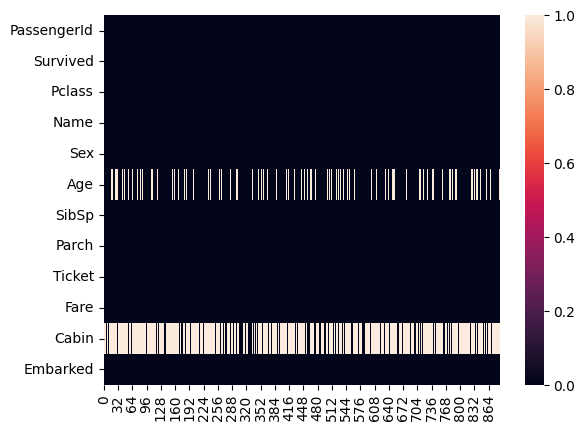

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull().transpose())

In [ ]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Age contains almost 20% data missing
* Cabin contains almost 77% data missing
* Embarked contains 0.2% data missing

# EDA(Elaboratory Data Analysis)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Distribution of target or label or Survived column

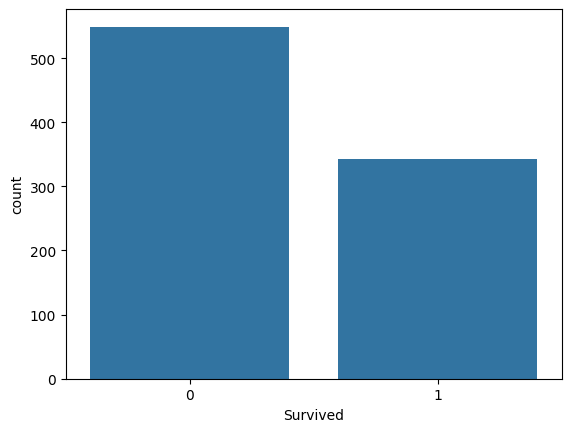

In [ ]:
sns.countplot(x="Survived", data=df)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


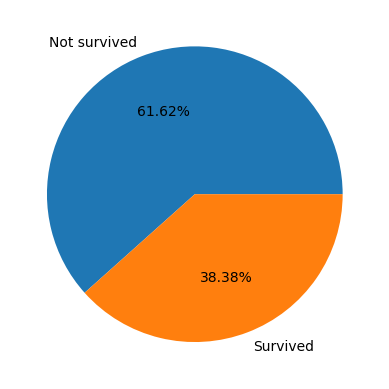

In [ ]:
s = df.Survived.value_counts()
print(s)
plt.pie(s.values, labels=["Not survived", "Survived"], autopct="%.2f%%")
plt.show()

### It is a imbalanced data

In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: xlabel='Pclass', ylabel='count'>

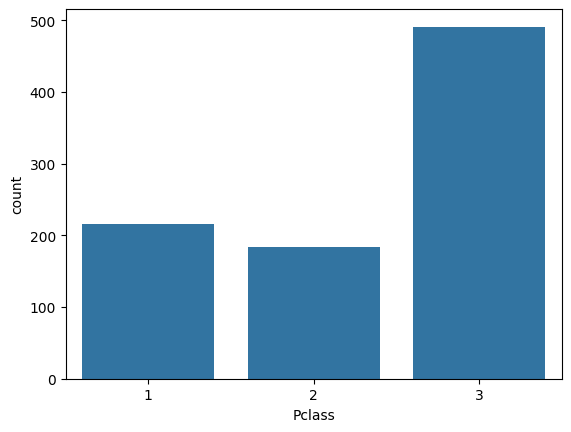

In [ ]:
sns.countplot(x="Pclass", data=df)

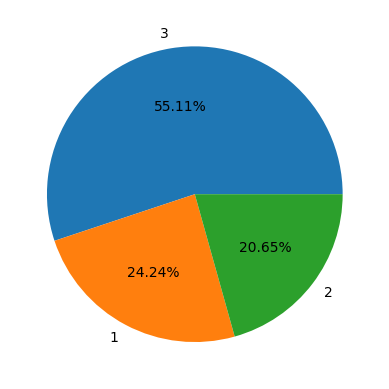

In [ ]:
s = df.Pclass.value_counts()
plt.pie(s.values, labels=s.index, autopct="%.2f%%")
plt.show()

* Most passengers are in 3rd class

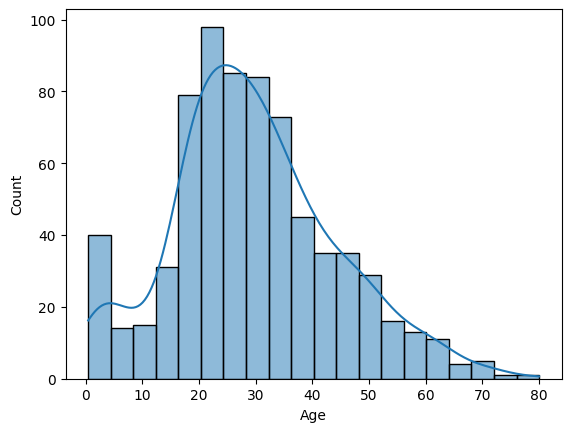

In [ ]:
sns.histplot(df["Age"], kde=True)
plt.show()

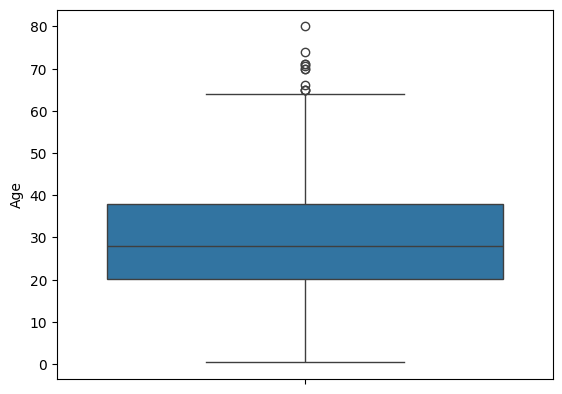

In [ ]:
sns.boxplot(df.Age)
plt.show()

# Is there any relationship between survived and Pclass

<Axes: xlabel='Pclass', ylabel='count'>

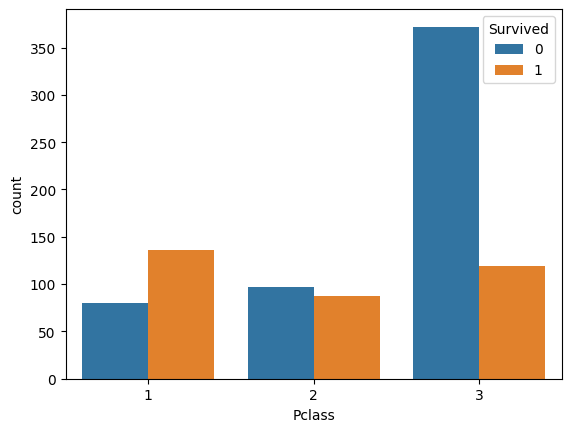

In [ ]:
sns.countplot(x="Pclass", hue="Survived", data=df)

* In Pclass 1 most people survived compared to dead
* In Pclass 2 most people died compared to survived

<Axes: xlabel='Sex', ylabel='count'>

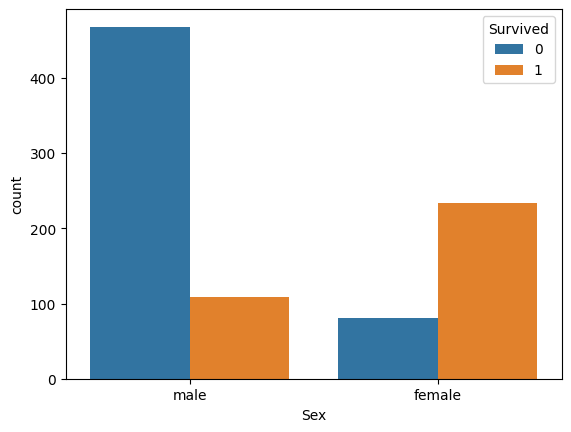

In [ ]:
sns.countplot(x="Sex", hue="Survived", data=df)

* Most male died compared to survived.
* Most female survived compared to died

<Axes: ylabel='Age'>

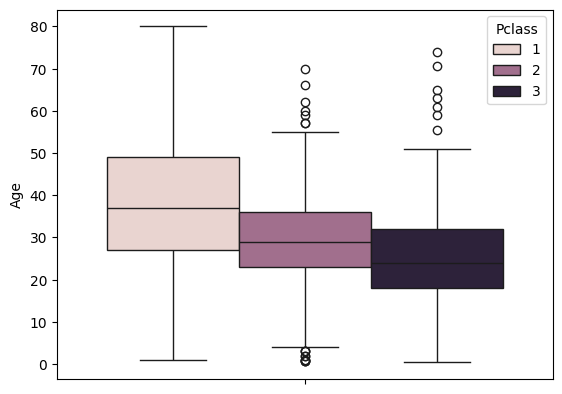

In [ ]:
sns.boxplot(y="Age", hue="Pclass", data=df)

In [ ]:
df.groupby("Pclass").Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
# import plotly.express as px
# px.box(y="Pclass", hue="Age")

### In this data Pclass and Age have some relationship

# Handling missing values

In [ ]:
def fill_age(cols):
    age = cols.iloc[0]
    pclass = cols.iloc[1]
    if pd.isna(age) and pclass == 1:
        return 37
    elif pd.isna(age) and pclass == 2:
        return 29
    elif pd.isna(age) and pclass == 3:
        return 24
    else:
        return age



In [ ]:
df.Age = df[["Age", "Pclass"]].apply(fill_age, axis="columns")

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Cabin contains 77% missing data so we drop the data

In [ ]:
df.drop("Cabin", axis="columns", inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# Embarked column contains only 2 row missing so we drip rows

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#PassengerId, Name and Ticket predict ot Survived so we drop those columns

In [ ]:
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Identifying features and labels

In [ ]:
X = df.iloc[:, 1:]
y = df.Survived

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Sex and Embarked are nominal data therefore, we will use one hot encoding.

In [ ]:
X_feature = pd.get_dummies(data=X, columns=["Sex", "Embarked"], drop_first=True)
X_feature

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=40)

In [ ]:
X_train.shape, y_train.shape

((711, 8), (711,))

In [ ]:
X_test.shape, y_test.shape

((178, 8), (178,))

# Model Logistic REgression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000) #  error occurs in default
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation

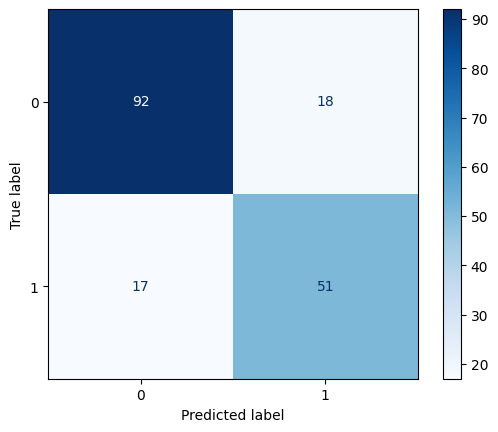

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")

# Precision score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred)
print(f"Precision score is {precision}.")

Precision score is 0.7391304347826086.


# Recall score

In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Recall score is {recall}.")

Recall score is 0.75.


# f1_score

In [ ]:
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"f1 score is {f1}.")

f1 score is 0.7445255474452556.


# Accuracy

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy score is {accuracy}.")

Accuracy score is 0.8033707865168539.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
y_test.value_counts()

0    110
1     68
Name: Survived, dtype: int64

# Comparing model with other Classification Algorithms
* SVM
* KNN

### SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1 score of svm is {f1}")

F1 score of svm is 0.44000000000000006


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) # n_neighbors is hyperparameter to be tuned
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
f1 = f1_score(y_true=y_test, y_pred=y_pred)
print(f"f1 score of knn is {f1}")

f1 score of knn is 0.5757575757575757


### f1 score of logistic regression is high among all algorithms. Therefore, LogisticRegression is best for this data.